# Max and Min Temperatures 2005-2014

An NOAA dataset has been stored in the file `assignment_1_data.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

The data you have been given is near **Ann Arbor, Michigan, United States**

In [1]:
import pandas as pd
from datetime import date as dt

df = pd.read_csv('assignment_1_data.csv').sort_values(by=['Date'])

# remove leap year day
df = df[~df['Date'].str.endswith('02-29')]
# remove 2015
df = df[~df['Date'].str.startswith('2015')]
# convert date strings to dt objects
df['Date'] = pd.to_datetime(df['Date'])
# tenths degrees to degrees (2 decimal points)
df['Data_Value'] = round(df["Data_Value"]/10, 2)


# create dataframes for min and max values
df_tmin = df[df['Element'] == 'TMIN'].drop(['ID', 'Element'], axis=1)
df_tmax = df[df['Element'] == 'TMAX'].drop(['ID', 'Element'], axis=1)

# aggregate min and max values for each day (pandas series with date as an index)
df_tmin = df_tmin.groupby(['Date'])['Data_Value'].min()
df_tmax = df_tmax.groupby(['Date'])['Data_Value'].max()

# df_tmax.to_csv('tmp.csv')
print('\ndf_tmin head: ')
print(df_tmin.head())
print('\ndf_tmax tail: ')
print(df_tmax.tail())

print('\nSize of data series:')
print(f'df_tmin: {df_tmin.size}')
print(f'df_tmax: {df_tmax.size}')



df_tmin head: 
Date
2005-01-01   -5.6
2005-01-02   -5.6
2005-01-03    0.0
2005-01-04   -3.9
2005-01-05   -9.4
Name: Data_Value, dtype: float64

df_tmax tail: 
Date
2014-12-27    11.1
2014-12-28    13.3
2014-12-29     8.9
2014-12-30     3.3
2014-12-31    -2.8
Name: Data_Value, dtype: float64

Size of data series:
df_tmin: 3650
df_tmax: 3650


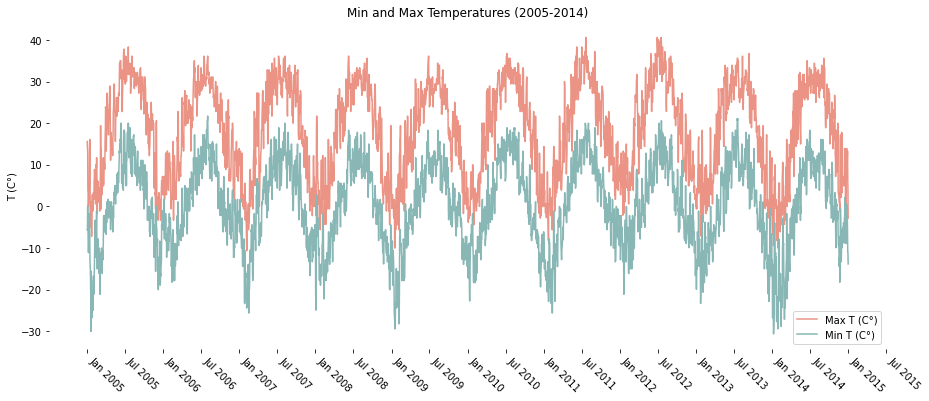

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(df_tmax, color='#EB9486')
plt.plot(df_tmin, color='#88B7B5')
# plt.fill_between(df_tmin.index, df_tmin.values, df_tmax.values, color='#D3D3D3')

# add title, labels, legend
plt.title('Min and Max Temperatures (2005-2014)')
plt.ylabel('T (C°)')
plt.legend(['Max T (C°)', 'Min T (C°)'])

# dejunkifying
plt.box(False)
plt.tick_params(
    bottom=True,
    # left=False,
    # labelleft=False,
)

import matplotlib.dates as mdates
# set xticks
# fig.autofmt_xdate()
plt.xticks(rotation=-45, ha='left')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
